Using the following tutorial:

https://towardsdatascience.com/understanding-arima-time-series-modeling-d99cd11be3f8

In [ ]:
import pandas as pd
#from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

The ARIMA function from *statsmodel* requires at least two arguments:

1.   Dataset = In this case, we use a pandas series of raw real GDP values
2.   Order = tells the ARIMA function how many components of each model type to consider in the following sequence (AR lags, time steps between difference, MA lags).

In [ ]:
gdp = pd.read_csv('/content/drive/MyDrive/Time-series anomaly detection/GDP.csv')

In [ ]:
gdp

,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742
...,...,...
303,2022-10-01,26408.405
304,2023-01-01,26813.601
305,2023-04-01,27063.012
306,2023-07-01,27610.128


**First Attempt**: checking our what an AR model looks like with no moving average. We will take a 1 time step difference to make our data stationary

In [ ]:
mod = ARIMA(gdp['GDP'], order=(4,1,0))
mod.fit()
predictions = mod.fit().predict()

In [ ]:
print(predictions)

0          0.000000
1        246.292508
2        250.071202
3        253.483744
4        263.821025
           ...     
303    26377.804079
304    26737.159903
305    27138.548322
306    27356.710477
307    27874.905100
Name: predicted_mean, Length: 308, dtype: float64


In [ ]:
gdp['Predictions'] = predictions

In [ ]:
gdp

,DATE,GDP,Predictions
0,1947-01-01,243.164,0.000000
1,1947-04-01,245.968,246.292508
2,1947-07-01,249.585,250.071202
3,1947-10-01,259.745,253.483744
4,1948-01-01,265.742,263.821025
...,...,...,...
303,2022-10-01,26408.405,26377.804079
304,2023-01-01,26813.601,26737.159903
305,2023-04-01,27063.012,27138.548322
306,2023-07-01,27610.128,27356.710477


In [ ]:
#Taking 20 months of 2023 data to plot in order to see the predictions
twenty_months = gdp.tail(20)

In [ ]:
twenty_months

,DATE,GDP,Predictions
288,2019-01-01,21104.133,21090.323310
289,2019-04-01,21384.775,21240.937804
290,2019-07-01,21694.282,21513.484160
291,2019-10-01,21902.390,21849.771775
292,2020-01-01,21706.513,22093.672656
293,2020-04-01,19913.143,21870.231986
294,2020-07-01,21647.640,19857.396203
295,2020-10-01,22024.502,21287.249021
296,2021-01-01,22600.185,21993.605837
297,2021-04-01,23292.362,22886.005508


<Axes: >

<Figure size 640x480 with 0 Axes>

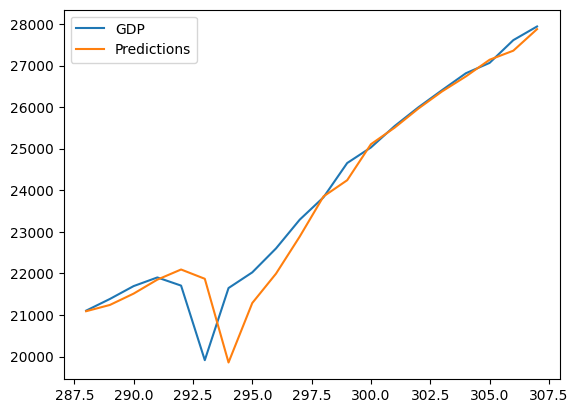

In [ ]:
plt.figure()
twenty_months.plot()

After seeing the initial results, let's add the 2 MA components to the model:

In [ ]:
mod1 = ARIMA(gdp['GDP'], order=(4,1,2))
mod1.fit()
predictions_MA = mod1.fit().predict()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
predictions_MA

0          0.000000
1        253.451438
2        253.008103
3        254.774866
4        265.303352
           ...     
303    26376.846924
304    26695.505329
305    27208.035754
306    27365.170289
307    27990.012968
Name: predicted_mean, Length: 308, dtype: float64

In [ ]:
gdp['Predictions with Average'] = predictions_MA

The model now has the ability to course correct a bit by allowing it to consider the magnitudes and directions of its errors. The plot below shows its results:

In [ ]:
ma_predictions_months = gdp.tail(30)

<Axes: >

<Figure size 640x480 with 0 Axes>

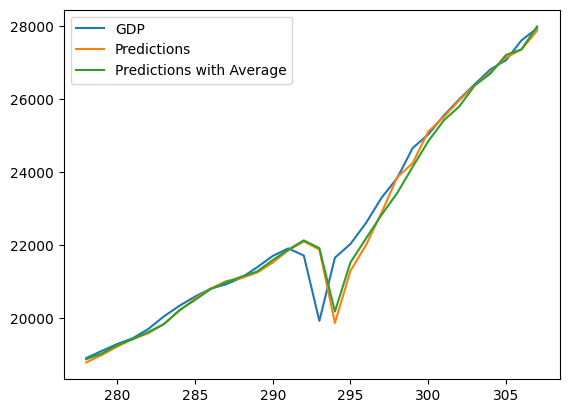

In [ ]:
plt.figure()
ma_predictions_months.plot()

While this appears to not be much better, the AR and MA components are both derived from the target variable's past values. Essentially, they are both attempts to forecast the future by extrapolating the past.

**Note: We expect this to work alright during periods of calm, but fail miserably when attempting to predict specific turning points.**